In [1]:
import numpy as np
from numpy import random as rn
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [2]:
# Initialize random Generator
rng = rn.default_rng(seed=24)

In [3]:
# PARAMETERS
# Nbr of existing features
num_feat = 4
stddev_ctx = 0.1
num_ctx = 5
dim_ctx = 10
num_words = 10
num_inst = 5

Let's create some random context vectors

In [4]:
base_contexts = rng.random((num_ctx, dim_ctx)) - 0.5

Set of features to choose from

In [5]:
features = [i for i in range(num_feat)]

Function to add noise to a context vector

In [6]:
def add_noise(orig_context, stddev_ctx=stddev_ctx):
    noise = rng.normal(scale=stddev_ctx)
    return orig_context + noise

Then, we create (c, f, p) sets for each word instance

In [7]:
words = {}
counter = 0
contexts = []
y = []
for i in range(num_words):
    for j in range(num_inst):
        if i not in words.keys():
            words[i] = {}
        context_num = rng.integers(len(base_contexts))
        y.append(context_num)
        contexts.append(add_noise(base_contexts[context_num]))
        curr_feat = rng.choice(features)
        curr_prob = rng.random()
        words[i][j] = {
            'ctx': counter, 
            'feat': curr_feat,
            'prob': curr_prob
        }
        counter += 1

In [8]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(np.array(contexts))

/home/glicerico/miniconda3/envs/csc/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/glicerico/miniconda3/envs/csc/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.896532
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.162552
[t-SNE] KL divergence after 1000 iterations: 0.215819


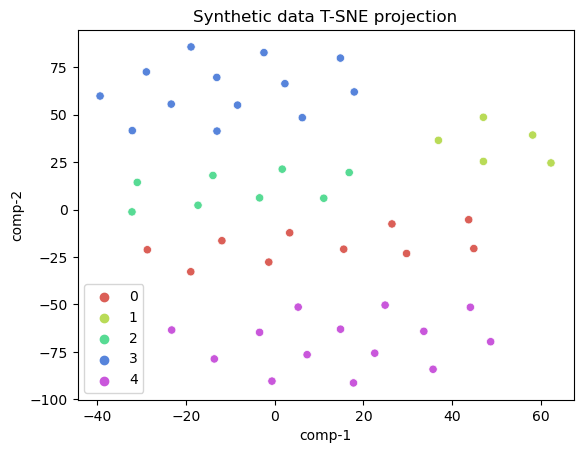

In [9]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

import matplotlib.pyplot as plt
ax = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="Synthetic data T-SNE projection") 
plt.show()